<a href="https://colab.research.google.com/github/nnilayy/Unet/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import glob 
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import tensorflow as tf

## Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Image Size

In [5]:
IMAGE_SIZE=128

## Dataset

In [6]:
import matplotlib.pyplot as plt
import cv2 
import glob 
import numpy as np
X=[]
y=[]
images=sorted(glob.glob('/content/drive/MyDrive/Balls/Images/*'))
masks=sorted(glob.glob('/content/drive/MyDrive/Balls/Masks/*'))

for image in images:
  image=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
  image=cv2.resize(image,(IMAGE_SIZE,IMAGE_SIZE))
  image=image/255
  X.append(image)

for mask in masks:
  mask=cv2.imread(mask,cv2.IMREAD_GRAYSCALE)
  mask=cv2.resize(mask,(IMAGE_SIZE,IMAGE_SIZE))
  mask=mask/255
  mask=np.where(mask>0.5,1,0).astype(mask.dtype)
  y.append(mask)

In [7]:
X=np.array(X)
y=np.array(y)

In [8]:
len(images)
X.shape

(480, 128, 128)

## Visualizing Images and Masks

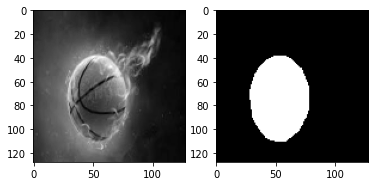

In [9]:
index=456
image=X[index]
mask=y[index]
plt.subplot(1, 2, 1)
plt.imshow(image,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(mask,cmap='gray')
plt.show()

## Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input,Conv2D, MaxPooling2D, Resizing,AveragePooling2D, Flatten, Dropout, BatchNormalization, InputLayer, Reshape
model = Sequential()
model.add(InputLayer(input_shape=(64, 64, 1)))
model.add(Conv2D(64, 2, padding='same', activation="relu"))

model.add(Resizing(64, 64, interpolation='nearest'))

# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(8, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(4, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(1, 1, padding='same', activation="relu"))
# model.add(Resizing(64, 64, interpolation='bilinear'))

# model.add(Conv2D(16, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(8, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(4, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(1, 1, padding='same', activation="relu"))
# model.add(Resizing(64, 64, interpolation='bilinear'))

# model.add(Conv2D(16, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(8, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(4, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(1, 1, padding='same', activation="relu"))
# model.add(Resizing(64, 64, interpolation='bilinear'))

# model.add(Conv2D(16, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(8, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(4, 3, padding='same', activation="relu"))
# model.add(AveragePooling2D(2, padding='same'))
# model.add(Conv2D(1, 1, padding='same', activation="relu"))
# model.add(Resizing(64, 64, interpolation='bilinear'))
# model.add(Flatten())
# model.add(Dense(64, activation="relu"))
# model.add(Dense(4096, activation="relu"))
model.summary()

In [ ]:
from keras.models import Model
from keras.layers import concatenate
# image=Input(shape=(64, 64, 1))
# conv1=Conv2D(64, 3, padding='same', activation="relu")(image)
# av1=AveragePooling2D(2, padding='same')(conv1)
# conv2=Conv2D(32, 3, padding='same', activation="relu")(av1)
# resize=Resizing(64, 64, interpolation='bilinear')(conv2)
# conv3=Conv2D(1, 1, padding='same', activation="relu")(resize)
# conc=concatenate([conv1, resize])
# conv4=Conv2D(1, 1, padding='same', activation="relu")(conc)
# conv2=Conv2D(1, 1, padding='same', activation="relu")(conv1)
# conv3=Conv2D(1, 1, padding='same', activation="relu")(conc)

# resize=Resizing(64, 64, interpolation='bilinear')(conv2)
# av1=AveragePooling2D(2, padding='same')(conv1)
# conv2=Conv2D(16, 3, padding='same', activation="relu")(av1)
# av2=AveragePooling2D(2, padding='same')(conv2)
# conv3=Conv2D(8, 3, padding='same', activation="relu")(av2)
# av3=AveragePooling2D(2, padding='same')(conv3)
# conv4=Conv2D(1, 1, padding='same', activation="relu")(av3)

image=Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))
conv1=Conv2D(16, 4, padding='same', activation="relu")(image)
conv2=Conv2D(8, 4, padding='same', activation="relu")(conv1)
av1=AveragePooling2D(2, padding='same')(conv2)
conv3=Conv2D(16, 4, padding='same', activation="relu")(av1)
conv4=Conv2D(8, 4, padding='same', activation="relu")(conv3)
av2=AveragePooling2D(2, padding='same')(conv4)
conv5=Conv2D(16, 4, padding='same', activation="relu")(av2)
conv6=Conv2D(8, 4, padding='same', activation="relu")(conv5)
av3=AveragePooling2D(2, padding='same')(conv6)
resize=Resizing(IMAGE_SIZE, IMAGE_SIZE, interpolation='bilinear')(av3)
conc=concatenate([conv1,resize])
conv5=Conv2D(1, 1, padding='same', activation="relu")(conc)
model=Model(inputs=image, outputs=conv5)
model.summary()
# --------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------
# image=Input(shape=(64, 64, 1))
# conv1=Conv2D(16, 4, padding='same')(image)
# bn1=BatchNormalization()(conv1)
# drop1=Dropout(0.15)(bn1)
# act1=Activation("relu")(drop1)
# conv2=Conv2D(8, 4, padding='same')(act1)
# bn2=BatchNormalization()(conv2)
# drop2=Dropout(0.15)(bn2)
# act2=Activation("relu")(drop2)
# av1=AveragePooling2D(2, padding='same')(act2)
# conv3=Conv2D(16, 4, padding='same', activation="relu")(av1)
# bn3=BatchNormalization()(conv3)
# drop3=Dropout(0.15)(bn3)
# act3=Activation("relu")(drop3)
# conv4=Conv2D(8, 4, padding='same', activation="relu")(act3)
# bn4=BatchNormalization()(conv4)
# drop4=Dropout(0.15)(bn4)
# act4=Activation("relu")(drop4)
# av2=AveragePooling2D(2, padding='same')(act4)
# conv5=Conv2D(16, 4, padding='same', activation="relu")(av2)
# bn5=BatchNormalization()(conv5)
# drop5=Dropout(0.15)(bn5)
# act5=Activation("relu")(drop5)
# conv6=Conv2D(8, 4, padding='same', activation="relu")(act5)
# bn6=BatchNormalization()(conv6)
# drop6=Dropout(0.15)(bn6)
# act6=Activation("relu")(drop6)
# av3=AveragePooling2D(2, padding='same')(act6)
# resize=Resizing(64, 64, interpolation='bilinear')(av3)
# conc=concatenate([conv1,resize])
# conv5=Conv2D(1, 1, padding='same', activation="relu")(conc)
# model=Model(inputs=image, outputs=conv5)
# model.summary()
# --------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------

In [ ]:
import tensorflow as tf
model.compile(loss="mse", 
              optimizer=tf.keras.optimizers.experimental.Adam(learning_rate=1e-3),
              metrics='mean_absolute_error')
model.fit(X, 
          y, 
          steps_per_epoch=32, 
          epochs=300, 
          verbose=1)

Epoch 1/300
32/32 [==============================] - 13s 15ms/step - loss: 0.1303 - mean_absolute_error: 0.2461
Epoch 2/300
32/32 [==============================] - 0s 11ms/step - loss: 0.1168 - mean_absolute_error: 0.2434
Epoch 3/300
32/32 [==============================] - 0s 11ms/step - loss: 0.1059 - mean_absolute_error: 0.2103
Epoch 4/300
32/32 [==============================] - 0s 11ms/step - loss: 0.0940 - mean_absolute_error: 0.1818
Epoch 5/300
32/32 [==============================] - 0s 11ms/step - loss: 0.0834 - mean_absolute_error: 0.1679
Epoch 6/300
32/32 [==============================] - 0s 11ms/step - loss: 0.0775 - mean_absolute_error: 0.1605
Epoch 7/300
32/32 [==============================] - 0s 11ms/step - loss: 0.0713 - mean_absolute_error: 0.1511
Epoch 8/300
32/32 [==============================] - 0s 11ms/step - loss: 0.0660 - mean_absolute_error: 0.1407
Epoch 9/300
32/32 [==============================] - 0s 11ms/step - loss: 0.0652 - mean_absolute_error: 0.1407


## Prediction

1/1 [==============================] - 0s 186ms/step


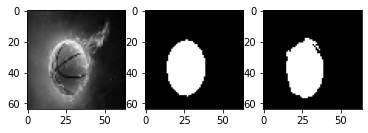

In [134]:
# Test Image
index=456
test=X[index]
actual=y[index]
# file='/content/download.jpg'
# test=cv2.imread(file,cv2.IMREAD_GRAYSCALE)
# test=cv2.resize(test,(IMAGE_SIZE,IMAGE_SIZE))
# test=np.array(test)
image=test

# Prediction
prediction=model.predict(test.reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1))[0]
prediction=np.where(prediction>0.3,1,0).astype(prediction.dtype)

#Subplots 
plt.subplot(1, 3, 1)
plt.imshow(image,cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(actual,cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(prediction,cmap='gray')
plt.show()
# test.reshape(-1,128,128,1)

## Prediction on Random Image

In [ ]:
# test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=1)
# print('Accuracy = %f' % test_acc)

In [135]:
model.save("/content/model_64.h5")

In [136]:
import os
def get_file_size(file_path):
  size=os.path.getsize(file_path)
  return size

def convert_bytes(size,unit=None):
  if unit=="KB":
    return print("File size: "+str(round(size/1024,3))+" Kilobytes")
  elif unit=="MB":
    return print("File size: "+str(round(size/(1024*1024),3))+" Megabytes")
  else:
    return print("File size: "+str(size)+"bytes")

In [ ]:
# Model Size Before Model Quantization
model="/content/model_64.h5"
convert_bytes(get_file_size(model),"MB")

In [139]:
X=np.expand_dims(X,-1)
X=tf.cast(X,tf.float32)
X.shape 

TensorShape([480, 64, 64, 1])

In [140]:


# def dataset_generator():
#    for i in range(100):
#       yield ([X])

In [ ]:
import tensorflow as tf
model="/content/model_64.h5"
model=tf.keras.models.load_model(model)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations=[tf.lite.Optimize.DEFAULT]
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.representative_dataset=dataset_generator
tflite_model_name="model.tflite"
tflite_model = converter.convert()
open(tflite_model_name,"wb").write(tflite_model)

In [ ]:
# Model Size After Model Quantization
tflite_model="/content/model.tflite"
convert_bytes(get_file_size(tflite_model),"KB")

In [145]:
import binascii
def convert_to_c_array(bytes) -> str:
  hexstr = binascii.hexlify(bytes).decode("UTF-8")
  hexstr = hexstr.upper()
  array = ["0x" + hexstr[i:i + 2] for i in range(0, len(hexstr), 2)]
  array = [array[i:i+10] for i in range(0, len(array), 10)]
  return ",\n  ".join([", ".join(e) for e in array])

tflite_binary = open('model.tflite', 'rb').read()
ascii_bytes = convert_to_c_array(tflite_binary)
header_file = "const unsigned char model_tflite[] = {\n  " + ascii_bytes + "\n};\nunsigned int model_tflite_len = " + str(len(tflite_binary)) + ";"
open("model_64.h", "w").write(header_file)
convert_bytes(get_file_size('/content/model_64.h'),"KB")

File size: 105.091 Kilobytes


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
model_no_quant_tflite = converter.convert()
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)
def representative_dataset():
  for i in range(500):
    yield([x_train[i].reshape(1, 1)])
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.representative_dataset = representative_dataset
model_tflite = converter.convert()
open(MODEL_TFLITE, "wb").write(model_tflite)